## MSN 514 HW:1 
### Erinç Ada Ceylan 22101844

#### 1) Pre-defs, imports, parameters, equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

np.random.seed(514)  # for the repeatability of the random numbers

m1 = 1.0    
m2 = 3.0    
m3 = 2.0    
k1 = 1.0  
k2 = 2.0 
L0 = 1.0  
L1 = 1.0 

x1_eq = 0.0
x2_eq = x1_eq + L0   # = 1.0
x3_eq = x2_eq + L1   # = 2.0

# random initial conditions

dx_range = 0.1
dx1 = np.random.uniform(-dx_range, dx_range)
dx2 = np.random.uniform(-dx_range, dx_range)
dx3 = np.random.uniform(-dx_range, dx_range)
x1_init = x1_eq + dx1
x2_init = x2_eq + dx2
x3_init = x3_eq + dx3

v_range = 0.1
v1_init = np.random.uniform(-v_range, v_range)
v2_init = np.random.uniform(-v_range, v_range)
v3_init = np.random.uniform(-v_range, v_range)

dt = 0.01            # time step
T  = 20.0            # total simulation time
n_steps = int(T/dt)  # number of time steps

#### 2) Verlet

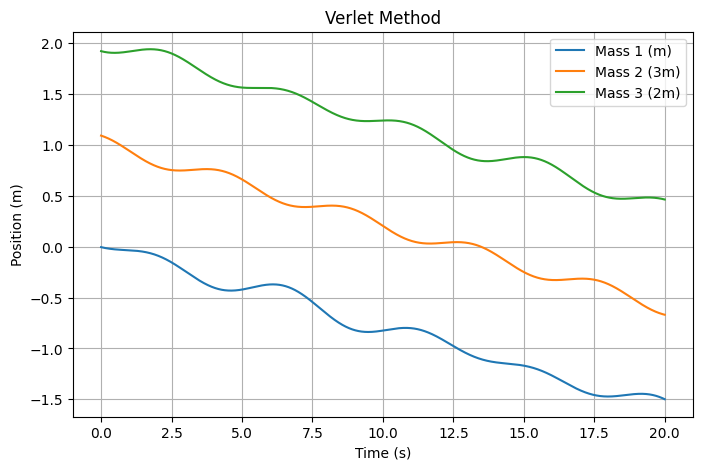

In [2]:
# Arrays for positions, velocities, and time
x1 = np.zeros(n_steps+1)
x2 = np.zeros(n_steps+1)
x3 = np.zeros(n_steps+1)
v1 = np.zeros(n_steps+1)
v2 = np.zeros(n_steps+1)
v3 = np.zeros(n_steps+1)
t_values = np.linspace(0, T, n_steps+1)

# Initial conditions
x1[0], x2[0], x3[0] = x1_init, x2_init, x3_init
v1[0], v2[0], v3[0] = v1_init, v2_init, v3_init

def compute_accelerations(x1, x2, x3):
    F12 = k1 * (x2 - x1 - L0)
    F23 = k2 * (x3 - x2 - L1)
    return F12/m1, (F23 - F12)/m2, -F23/m3

# Verlet integration loop
for i in range(n_steps):
    a1, a2, a3 = compute_accelerations(x1[i], x2[i], x3[i])
    x1[i+1] = x1[i] + v1[i]*dt + 0.5*a1*dt**2
    x2[i+1] = x2[i] + v2[i]*dt + 0.5*a2*dt**2
    x3[i+1] = x3[i] + v3[i]*dt + 0.5*a3*dt**2
    a1_new, a2_new, a3_new = compute_accelerations(x1[i+1], x2[i+1], x3[i+1])
    v1[i+1] = v1[i] + 0.5*(a1 + a1_new)*dt
    v2[i+1] = v2[i] + 0.5*(a2 + a2_new)*dt
    v3[i+1] = v3[i] + 0.5*(a3 + a3_new)*dt

plt.figure(figsize=(8,5))
plt.plot(t_values, x1, label='Mass 1 (m)')
plt.plot(t_values, x2, label='Mass 2 (3m)')
plt.plot(t_values, x3, label='Mass 3 (2m)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Verlet Method')
plt.legend()
plt.grid(True)
plt.show()


#### 2) Time Evolution Operator

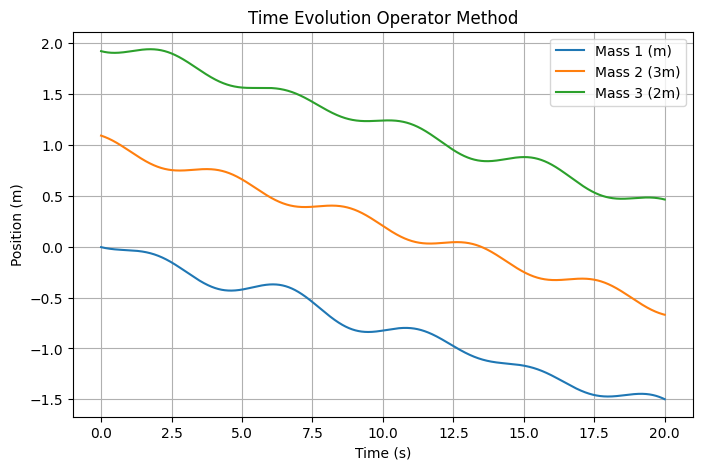

In [3]:
# Initial displacements
u1_init = x1_init - x1_eq
u2_init = x2_init - x2_eq
u3_init = x3_init - x3_eq

# Initial state vector
r = np.array([u1_init, u2_init, u3_init, v1_init, v2_init, v3_init])

# setting the matrix
A = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [-k1/m1, k1/m1, 0, 0, 0, 0],
    [k1/m2, -(k1+k2)/m2, k2/m2, 0, 0, 0],
    [0, k2/m3, -k2/m3, 0, 0, 0]
])

# Time evolution operator
U = expm(A * dt)

# Arrays to store results
r_values = np.zeros((n_steps+1, 6))
r_values[0] = r
t_values_TE = np.linspace(0, T, n_steps+1)

# Time evolution loop
for i in range(n_steps):
    r = U @ r  # dot product
    r_values[i+1] = r

# Extract positions and velocities
x1_TE = r_values[:, 0] + x1_eq
x2_TE = r_values[:, 1] + x2_eq
x3_TE = r_values[:, 2] + x3_eq
v1_TE = r_values[:, 3]
v2_TE = r_values[:, 4]
v3_TE = r_values[:, 5]

plt.figure(figsize=(8,5))
plt.plot(t_values_TE, x1_TE, label='Mass 1 (m)')
plt.plot(t_values_TE, x2_TE, label='Mass 2 (3m)')
plt.plot(t_values_TE, x3_TE, label='Mass 3 (2m)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Time Evolution Operator Method')
plt.legend()
plt.grid(True)
plt.show()

#### 3) Plot Together

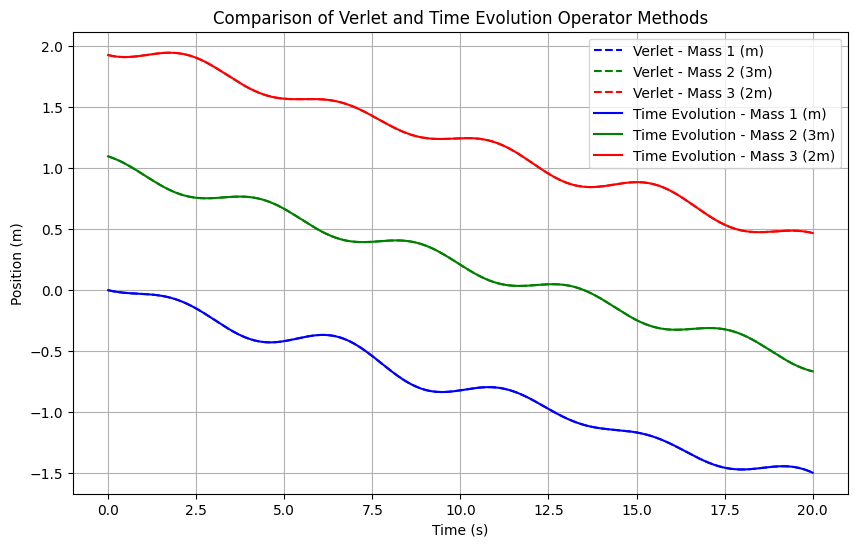

In [4]:
plt.figure(figsize=(10, 6))

# Plotting Verlet results
plt.plot(t_values, x1, label='Verlet - Mass 1 (m)', linestyle='--', color='blue')
plt.plot(t_values, x2, label='Verlet - Mass 2 (3m)', linestyle='--', color='green')
plt.plot(t_values, x3, label='Verlet - Mass 3 (2m)', linestyle='--', color='red')

# Plotting Time Evolution Operator results
plt.plot(t_values_TE, x1_TE, label='Time Evolution - Mass 1 (m)', linestyle='-', color='blue')
plt.plot(t_values_TE, x2_TE, label='Time Evolution - Mass 2 (3m)', linestyle='-', color='green')
plt.plot(t_values_TE, x3_TE, label='Time Evolution - Mass 3 (2m)', linestyle='-', color='red')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Comparison of Verlet and Time Evolution Operator Methods')
plt.legend()
plt.grid(True)
plt.show()

#### 4) Fully GPT generated animation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

frame_interval = 50
skip_frames = 10

fig, ax = plt.subplots(figsize=(8, 4))
circles = [patches.Circle((x1[0], 0), radius=0.1, edgecolor='black', facecolor=color) for x1, color in zip([x1, x2, x3], ['blue', 'green', 'red'])]
for circle in circles:
    ax.add_patch(circle)
lines = [ax.plot([], [], 'k-', lw=1)[0] for _ in range(2)]
ax.set(xlim=(-2, 4), ylim=(-1, 1), aspect='equal', title="Verlet")

def update_verlet(frame):
    idx = frame * skip_frames
    if idx >= len(x1):
        return
    for circle, x in zip(circles, [x1, x2, x3]):
        circle.set_center((x[idx], 0))
    lines[0].set_data([x1[idx], x2[idx]], [0, 0])
    lines[1].set_data([x2[idx], x3[idx]], [0, 0])
    return circles + lines

anim_verlet = FuncAnimation(fig, update_verlet, frames=len(x1)//skip_frames, interval=frame_interval, blit=False)
plt.close()
display(HTML(anim_verlet.to_jshtml()))

fig2, ax2 = plt.subplots(figsize=(8, 4))
circles_TE = [patches.Circle((x1_TE[0], 0), radius=0.1, edgecolor='black', facecolor=color) for x1_TE, color in zip([x1_TE, x2_TE, x3_TE], ['blue', 'green', 'red'])]
for circle in circles_TE:
    ax2.add_patch(circle)
lines_TE = [ax2.plot([], [], 'k-', lw=1)[0] for _ in range(2)]
ax2.set(xlim=(-2, 4), ylim=(-1, 1), aspect='equal', title="Time Evolution Operator")

def update_time_eval(frame):
    idx = frame * skip_frames
    if idx >= len(x1_TE):
        return
    for circle, x in zip(circles_TE, [x1_TE, x2_TE, x3_TE]):
        circle.set_center((x[idx], 0))
    lines_TE[0].set_data([x1_TE[idx], x2_TE[idx]], [0, 0])
    lines_TE[1].set_data([x2_TE[idx], x3_TE[idx]], [0, 0])
    return circles_TE + lines_TE

anim_time_eval = FuncAnimation(fig2, update_time_eval, frames=len(x1_TE)//skip_frames, interval=frame_interval, blit=False)
plt.close()
display(HTML(anim_time_eval.to_jshtml()))
